<div style="display: block; width: 100%; height: 120px;">

<p style="float: left;">
    <span style="font-weight: bold; line-height: 24px; font-size: 16px;">
        DIGHUM160 - Critical Digital Humanities
        <br />
        Digital Hermeneutics
    </span>
    <br >
    <span style="line-height: 22x; font-size: 14x; margin-top: 10px;">
        Week 1: Introduction <br />
        Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk)
    </span>
</p>

# Welcome!

In this notebook we will go over some basic operations in Python. 

## 1. Importing files from Google Drive

In [29]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Next, locate the file using its ID (to find the ID, go to your Drive folder, right-click on the file you want the ID of, and click "Get shareable link". The ID can be found in the link the Google gives you. For instance, in this link:

```
https://drive.google.com/file/d/1v2SYkCtIX6Pwg7rZyb25-Z2olLI8eNf_/view?usp=sharing
```

The ID is everything between the two forward brackets after `d/` and before `/view`. So: `1v2SYkCtIX6Pwg7rZyb25-Z2olLI8eNf_`

Make sure you have the `test.txt` file in your Google Drive!

In [30]:
downloaded = drive.CreateFile({'id':"14I5tYu0RDpa3k5YMJ1oJ4tXZJGBsSsGV"})   
downloaded.GetContentFile('test.txt')

Alternatively, you can use the `drive' method to "mount" your Google Drive within this notebook (meaning you can access all your files from there).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We can now navigate within our Google Drive folders.

In [ ]:
import os 
os.chdir("/content/drive/My Drive/Academia/DIGHUM160-resources") # You may need to change this to point to your location of the "DIGHUM160-resources" folder
!ls

AskTrumpSupporters.csv	mgtow_submissions.csv	   TRP_comments.csv
ferrante.txt		seduction_submissions.csv  TRP_submissions.csv
knaus.txt		test.txt


You can also use the Drive API to up- and download files to your Drive from a notebook, and so on. See https://colab.research.google.com/notebooks/io.ipynb

## Reading and preprocessing files

Let's work with a simple text file to get our feet wet.

Write a small utility function `read_file(filename)` that reads a specified file and simply returns all contents as a single string. Use it to read the example file 'test.txt' and save it in the variable `test`.

In [8]:
def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    # insert your code here
    with open(filename) as f:
        return f.read()
    
# this should work if your code is correct
test = read_file('test.txt')
test[:100]

'\nOne mild, overcast day in August 1969, a bus came winding its way along a narrow road at the far en'

Now, we are going to create a function `split_sentences` that performs some very simple sentence splitting when passed a text string. Each sentence will be represented as a new string, so the function as a whole returns a list of sentence strings. We assume that any occurrence of either  . or ! or ? marks the end of a sentence.

First, we'll create a function called `end_of_sentence_marker` that takes as argument a character and returns True if it is an end-of-sentence marker, otherwise it returns False.

In [9]:
# Define your function here
def end_of_sentence_marker(character):
    # insert your code here
    if character in [",", "?", "!"]:
        return True
    else:
        return False
    
# these tests should return True if your code is correct
print(end_of_sentence_marker("?") == True)
print(end_of_sentence_marker("a") == False)

True
True


An important function we will use is the built in `enumerate`. `enumerate` takes as argument any iterable (a string a list etc.). Let's see it in action:

In [10]:
for i, character in enumerate("Python"):
    print(i, character)

0 P
1 y
2 t
3 h
4 o
5 n


As we can see, enumerate allows us to iterate over an iterable and for each element in that iterable, it gives us its corresponding index. 

Now we can create our function `split_sentences`. 

In [11]:
def split_sentences(text):
    "Split a text string into a list of sentences."
    sentences = []
    start = 0
    for end, character in enumerate(text):
        if end_of_sentence_marker(character):
            sentence = text[start: end + 1]
            sentences.append(sentence)
            start = end + 1
    return sentences

split = split_sentences(test)

Within `split_sentences`, we define a variable 'sentences' in which we store the individual sentences. Next, we define a variable `start` and set it to zero. We're doing this as we need to extract both the start position and the end position of each sentence, and we know that the first sentence will always start at position 0.

Next, we use `enumerate` to *loop* over all individual characters in the text. Remember that enumerate returns pairs of indexes and their corresponding elements (here characters). For each character we check whether it is an end-of-sentence marker. If it is, the variable end marks the position in text where a sentence ends. 

There is an easier way to do this, however, which is through NLTK. We will use the `sent_tokenize` package, import it, and run it on our `test` data set.

In [15]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# your code here

sents = sent_tokenize(test)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Finally, let's visualize some of these results. We'll create a new variable called `sentence_length`, assigning an empty list to it. We'll then loop over our `split` variable (which contains all split sentences in our test file) and add the length of each sentence to the `sentence_length` variable (tip: use the built-in `len()` function).

In [16]:
# your code here
from nltk.tokenize import sent_tokenize

sentence_length = []
for s in split:
    sentence_length.append(len(s))


Finally, we'll import matplotlib and plot `sentence_length`. If you did everything right, the below code should give you a graph of the sentence lengths!

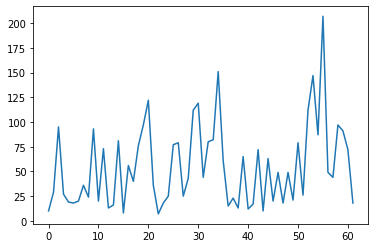

In [17]:
import matplotlib.pyplot as plt

plt.plot(sentence_length)

## 2. Working with Pandas

Next, we'll import a .csv into a Pandas dataframe. But first we have to get it. One way to do this is by using PyDrive. We need to authenticate ourselves to Google so we can access a unique file ID on our Google Drive.

In [31]:
downloaded = drive.CreateFile({'id':"1fOe3l9dLKb51jrwqUNOvwO4A7F7sM6Xx"})   # replace the id with id of file you want to access
downloaded.GetContentFile('seduction-submissions.csv')       

Next, we will import Pandas and use the read_csv function to open the example file. 
Then, show the first few lines of the dataframe (using the `.head()` function).

In [32]:
# Your code here
import pandas as pd

df = pd.read_csv("seduction-submissions.csv") 
df

,Unnamed: 0,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,6418,25879199,t3_feoin,1296760579,1,0,[deleted],Most flawless pick-up I've ever had all becasu...,NaN,"Okay, been reading seddit now for a while to l...",608,seduction,NaN,2205,119,NaN,NaN,NaN,NaN
1,1740,21540725,t3_ctoxh,1280122940,1,0,[deleted],New to Seddit? Check here first!,NaN,Found a post/comment insightful? Add it below!...,523,seduction,NaN,9990,34,NaN,NaN,NaN,NaN
2,5987,25554590,t3_f7q1q,1295824114,1,0,TofuTofu,Seddit 15k Milestone: Introducing two MAJOR ne...,NaN,"**EDIT:** Now fielding questions for Savoy, ou...",515,seduction,moderator,3637,76,NaN,NaN,NaN,NaN
3,3892,23830627,t3_e6rtv,1289881404,1,0,[deleted],Ten Steps to strong inner game. (by me),NaN,The following ten lessons/tips are all ones I'...,377,seduction,NaN,7149,90,NaN,NaN,NaN,NaN
4,8532,27794686,t3_gjqim,1302072551,1,0,TofuTofu,The Definitive Seddit Inner Game Collection,NaN,Hi guys. This post will be linked in the sideb...,334,seduction,moderator,6994,33,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,5978,25551318,t3_f7niu,1295813977,1,0,throawayseddit,"F-closed girl, underperformed, now feel like I...",NaN,"I'm an AFC, just read Strauss's The Game last ...",0,seduction,NaN,727,5,NaN,NaN,NaN,NaN
8247,1665,21458699,t3_crxmz,1279693527,1,0,[deleted],Looking to be someone's Wingman in Moncton,NaN,[deleted],0,seduction,NaN,9,0,NaN,NaN,NaN,NaN
8248,8165,27461656,t3_gcljs,1301249237,1,0,2E3,"A small suggestion: FR=Field report, LR=lay re...",NaN,This system seems to work so much better. With...,0,seduction,NaN,801,7,NaN,NaN,NaN,NaN
8249,3614,23580633,t3_e1exl,1288910656,1,0,[deleted],Ask Mature Seedit: Any tips?,NaN,[deleted],0,seduction,NaN,9,11,NaN,NaN,NaN,NaN


Here's what we're seeing. Pay special attention to the "NaN" labels, indicating missing values (we might want to get rid of them). Also remember the naming convention for the column and row axes (which Pandas uses when accessing particular rows/columns).

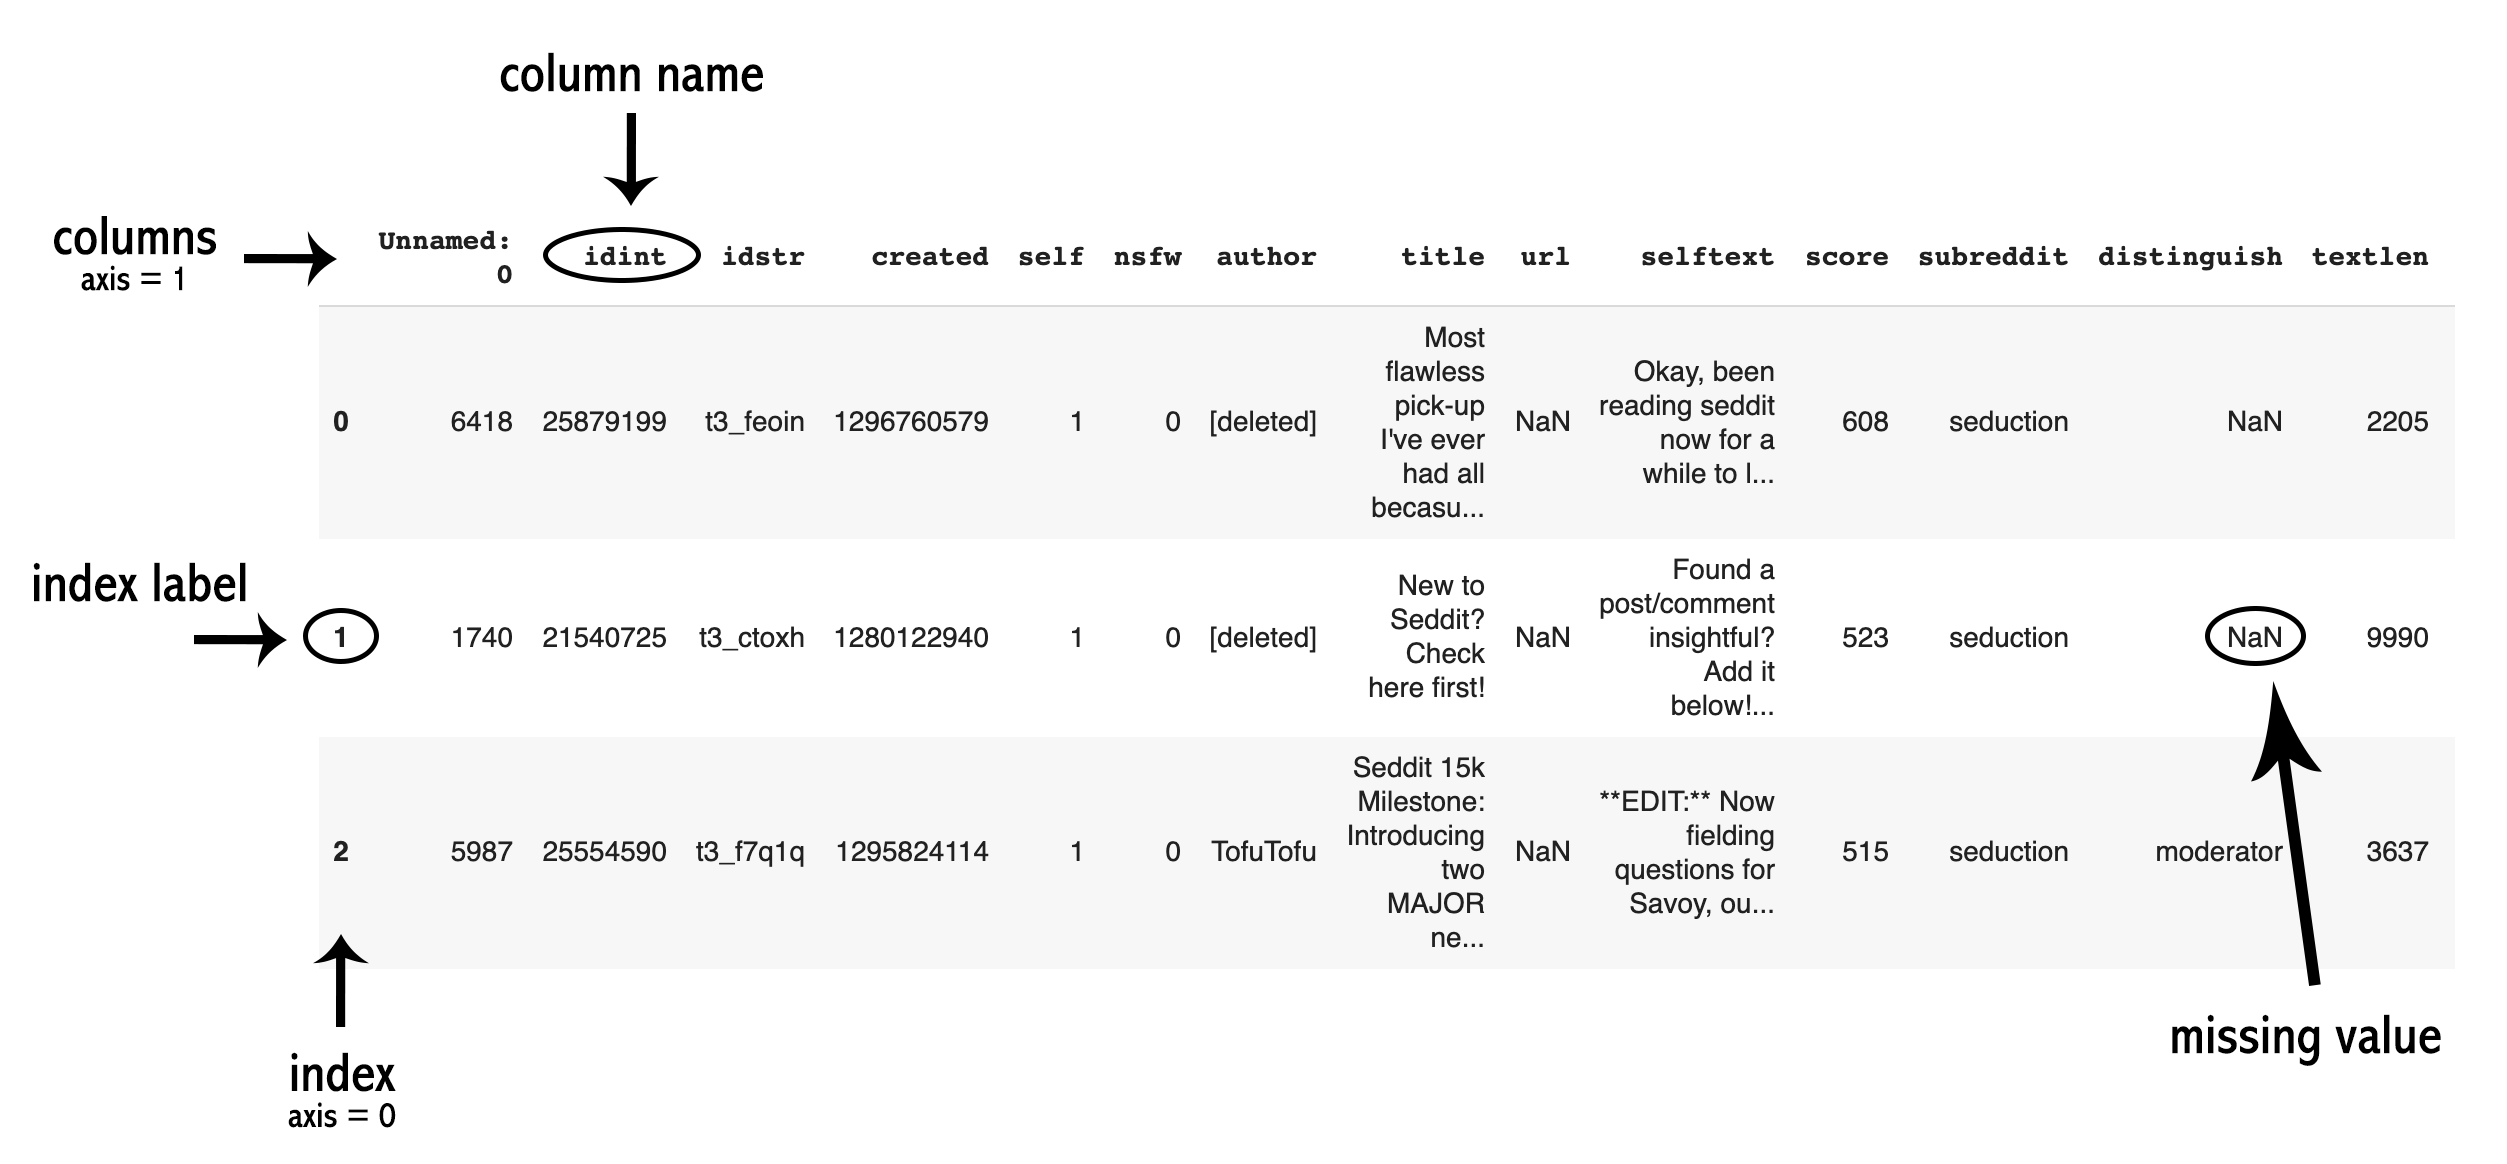

This particular dataset only includes the original posts in the subreddit (so not the comments on the posts). The "selftext" column contains the actual posts.

other columns contain valuable metadata you can use in your analyses, such as: 
- "created" (the time of the post's creation)
- "score" (amount of upvotes minus downvotes)
- "textlen" (amount of words)
- "num_comments" (the amount of comments)
- "flair_text" (a 'tag' that users within a subreddit can add)
- "augmented_count" (how often a user or moderator has edited the text)

In [40]:
# This allows you to quickly see which columns you have
df.columns

Index(['Unnamed: 0', 'idint', 'idstr', 'created', 'self', 'nsfw', 'author',
       'title', 'url', 'selftext', 'score', 'subreddit', 'distinguish',
       'textlen', 'num_comments', 'flair_text', 'flair_css_class',
       'augmented_at', 'augmented_count'],
      dtype='object')

## Tokenizing

Now, we'll write a function `tokenizer()` that takes as input a string. I'm assuming you know what this is, but if not, shout! 

There are lots of ways to tokenize, but here's one option.
- turn the string into lower case 
- remove newlines and tabs using `translate`
- clean up punctuation using `translate` and `string.punctuation`
- put all words in a list after removing digits
- return said list

In [45]:
import string
def tokenizer(text):
    '''cleans up and tokenizes input string'''
    text = text.lower()
    bad_chars = ['\n', '\t', '”', '“']
    textClean = text.translate(str.maketrans({ch: " " for ch in bad_chars}))
    table = str.maketrans({ch: None for ch in string.punctuation})
    no_punct = (s.translate(table) for s in textClean.split(' ') if s != '')
    digits_out = [word for word in no_punct if not word.isdigit()]       
    return digits_out

We can do the same, but using NLTK (a leading platform for processing human language data). I'm creating a very small function here with the `word_tokenize` method in NLTK. 

However, if you'll look at the output you'll see it's somewhat different from our own tokenizer!

In [74]:
import nltk
nltk.download('punkt')

def nltk_tokenizer(text): 
  tokens = nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now, we will want to use our tokenizer on only a subset of our data. Create a new dataframe which only contains the first 20 entries of our DataFrame. Also, remove all rows containing empty values. We can use Pandas' `dropna()` method for this. We will also make sure to only get rid of empty values in the "selftext" column.

In [56]:
# your code here
dfNew = df[:20].dropna(subset = ['selftext'])

Now let's run one of our tokenizer functions (compare them to see what's different!). We'll take as input the `body` column from your dataframe. Loop over each row of your dataframe, and print out the tokenized `body` of each row to see if it works.

In [73]:
# your code here
for row in dfNew['selftext']:
   print(nltk_tokenizer(row))

['Okay', ',', 'been', 'reading', 'seddit', 'now', 'for', 'a', 'while', 'to', 'learn', 'the', 'tricks', 'of', 'the', 'trade', '.', 'Mostly', 'I', "'ve", 'learned', 'how', 'to', 'be', 'more', 'confident', ',', 'so', 'thanks', 'seddit', '.', 'Any', 'how', ':', 'My', 'company', 'has', 'a', 'tiny', 'corporate', 'gym', 'with', 'a', 'mutli', 'work', 'out', 'station', ',', '2', 'eliptical', 'runners', ',', 'a', 'stationary', 'bike', 'and', 'a', 'small', 'weight', 'tree', '.', 'If', 'more', 'than', '5', 'people', 'are', 'in', 'there', 'it', "'s", 'very', 'crowded', '.', 'I', 'go', 'in', 'at', '4', 'before', 'the', 'after', 'work', 'crowd', 'fills', 'it', 'up', '.', 'I', "'m", 'usually', 'alone', '.', 'On', 'Monday', ',', 'a', 'hot', 'chick', 'with', 'a', 'killer', 'body', 'came', 'in', '.', 'There', 'was', 'obvious', 'stranger', 'tension', '.', 'I', 'was', 'trying', 'to', 'come', 'up', 'with', 'something', 'to', 'say', 'when', 'I', 'realized', 'the', 'show', 'I', 'was', 'watching', 'on', 'the',

Next, we'll create the type-token ratio for each user in our df, to see whose language is the most 'complex'. First, we'll create a function for you that computes the TTR (see if you understand how it works!)

In [58]:
def typeTokenRatio(tokens): 
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes/numTokens

Finally, loop over the 'body' column of each row in your df again. This time, within the loop, create a variable `tokens` and assign to it the output of your tokenizer function. Then, print the output of the `typeTokenRatio` function, which you run on `tokens`.

If things go well, you'll see the TTR for each of the 20 posts.

In [60]:
# your code here
for row in dfNew['selftext']:
    tokens = tokenizer(row)
    print(typeTokenRatio(tokens))

0.5373831775700935
0.4363013698630137
0.4690909090909091
0.3563579277864992
0.45953360768175583
0.49209932279909707
0.4304635761589404
0.5157593123209169
1.0
0.2868727825646224
0.3951612903225806
0.5386416861826698
0.4429223744292237
0.5096685082872928
1.0
0.5584045584045584
0.43036211699164345
0.6359223300970874
0.5294117647058824
0.4034729315628192


We see that some posts have a TTR of 1, meaning all words are unique. In fact, TTR does not tell us much here, as these are all short posts. But anyway: great work!

## Most-used words

Next, we'll write a short program that tells you the *10 most-used words* for a given user comment in the DataFrame. We will use the `Counter` class from the `collections` module.

In [76]:
# Your code here
from collections import Counter

comment = df.selftext.iloc[0]
tokens = tokenizer(comment)
Counter(tokens).most_common(10)

[('i', 22),
 ('the', 18),
 ('a', 17),
 ('and', 11),
 ('to', 10),
 ('she', 10),
 ('said', 8),
 ('it', 7),
 ('was', 7),
 ('my', 6)]